<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Interpolation-sur-les-ligne-de-courant" data-toc-modified-id="Interpolation-sur-les-ligne-de-courant-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Interpolation sur les ligne de courant</a></span></li></ul></div>

In [1]:
import warnings  
warnings.filterwarnings('ignore')
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
from matplotlib.colors import SymLogNorm
from matplotlib import cm
import geopandas as gpd
import seaborn as sns
from matplotlib.colors import LogNorm
from scipy import ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob
import pyvista as pv
import pandas as pd
# %matplotlib notebook

size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)



flowlines=np.sort(glob.glob('/home/urrutyb/Documents/PhD_TiPACCS/data_antarctica/flowline/flow_line_Ronnie*.csv'))

url='/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_sansDHDt_avecVisco_R4/mesh_24/'
files = sorted(glob.glob(url + 'OPTIM_sansDHDT_avecVisco_R4_*.pvtu'))
figure='/home/urrutyb/Documents/PhD_TiPACCS/inversion/inversion_Ronnie/step_3_inversion/OPTIM_sansDHDt_avecVisco_R4/figure/'


blocks = pv.MultiBlock([pv.read(f) for f in files])

x=blocks[0].points[:,0]
y=blocks[0].points[:,1]


flowline/flow_line_Ronnie1
--- 200.59662103652954 seconds ---
flowline/flow_line_Ronnie2
--- 201.1160249710083 seconds ---
flowline/flow_line_Ronnie3
--- 176.82080221176147 seconds ---
flowline/flow_line_Ronnie4
--- 179.4933841228485 seconds ---
flowline/flow_line_Ronnie5
--- 190.1941032409668 seconds ---
--- 948.2210803031921 seconds ---


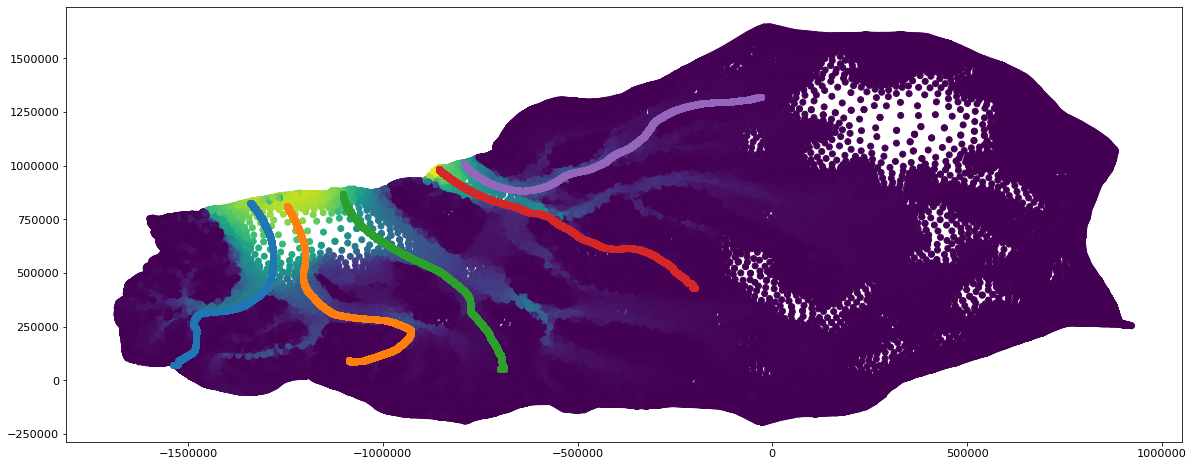

In [2]:
import time
start_time = time.time()
t_inf = time.time()


meth='linear'
plt.figure()
plt.scatter(x,y,c=np.sqrt(blocks[0].point_arrays['uobs'][:,0]**2+blocks[0].point_arrays['uobs'][:,1]**2))
for n in range(0,len(flowlines)):
    x_fl,y_fl=np.loadtxt(flowlines[n],skiprows=1,delimiter=',',usecols=(22,23),unpack=True)
    plt.scatter(x_fl,y_fl)
    eta=np.zeros([len(blocks),len(x_fl)])
    beta=np.zeros([len(blocks),len(x_fl)])
    djdbeta=np.zeros([len(blocks),len(x_fl)])
    djdeta=np.zeros([len(blocks),len(x_fl)])
    groundedmask=np.zeros([len(blocks),len(x_fl)])
    bedrock=np.zeros([len(blocks),len(x_fl)])
    zs=np.zeros([len(blocks),len(x_fl)])
    zb=np.zeros([len(blocks),len(x_fl)])
    alpha=np.zeros([len(blocks),len(x_fl)])
    mu=np.zeros([len(blocks),len(x_fl)])
    pdc_melt=np.zeros([len(blocks),len(x_fl)])
    h=np.zeros([len(blocks),len(x_fl)])
    uobs_mag=np.zeros([len(blocks),len(x_fl)])
    smb=np.zeros([len(blocks),len(x_fl)])
    pdc_area=np.zeros([len(blocks),len(x_fl)])
    ssavelocity_mag=np.zeros([len(blocks),len(x_fl)])
    dist=np.zeros(len(x_fl))
    for i in range(0,len(x_fl)-1):
        dist[i+1]=dist[i]+np.sqrt((x_fl[i]-x_fl[i+1])**2+(y_fl[i]-y_fl[i+1])**2)/1000
    for i in range(0,len(blocks)):
        eta[i,]=griddata((x,y),blocks[i].point_arrays['eta'],(x_fl,y_fl), method=meth)
        beta[i,]=griddata((x,y),blocks[i].point_arrays['beta'],(x_fl,y_fl), method=meth)
        djdbeta[i,]=griddata((x,y),blocks[i].point_arrays['djdbeta'],(x_fl,y_fl), method=meth)
        djdeta[i,]=griddata((x,y),blocks[i].point_arrays['djdeta'],(x_fl,y_fl), method=meth)
        groundedmask[i,]=griddata((x,y),blocks[i].point_arrays['groundedmask'],(x_fl,y_fl), method=meth)
        bedrock[i,]=griddata((x,y),blocks[i].point_arrays['bedrock'],(x_fl,y_fl), method=meth)
        zs[i,]=griddata((x,y),blocks[i].point_arrays['zs'],(x_fl,y_fl), method=meth)
        zb[i,]=griddata((x,y),blocks[i].point_arrays['zb'],(x_fl,y_fl), method=meth)
        alpha[i,]=griddata((x,y),blocks[i].point_arrays['alpha'],(x_fl,y_fl), method=meth)
        mu[i,]=griddata((x,y),blocks[i].point_arrays['mu'],(x_fl,y_fl), method=meth)
        pdc_melt[i,]=griddata((x,y),blocks[i].point_arrays['pdc_melt'],(x_fl,y_fl), method=meth)
        h[i,]=griddata((x,y),blocks[i].point_arrays['h'],(x_fl,y_fl), method=meth)
        uobs=blocks[i].point_arrays['uobs']
        uobs_mag[i,]=griddata((x,y),np.sqrt(uobs[:,0]**2+uobs[:,1]**2),(x_fl,y_fl), method=meth)
        smb[i,]=griddata((x,y),blocks[i].point_arrays['smb'],(x_fl,y_fl), method=meth)
        pdc_area[i,]=griddata((x,y),blocks[i].point_arrays['pdc_area'],(x_fl,y_fl), method=meth)
        ssavelocity=blocks[i].point_arrays['ssavelocity']
        ssavelocity_mag[i,:]=griddata((x,y),np.sqrt(ssavelocity[:,0]**2+ssavelocity[:,1]**2),(x_fl,y_fl), method=meth)
    d={'eta':eta,'beta':beta,'djdbeta':djdbeta,'djdeta':djdeta,'groundedmask': groundedmask,'bedrock':bedrock,'zs':zs,'zb':zb,'alpha':alpha,'mu':mu,'pdc_melt':pdc_melt,'h':h,
      'uobs_mag':uobs_mag,'smb':smb,'pdc_area':pdc_area,'ssavelocity_mag':ssavelocity_mag,'dist':dist}
    xx=flowlines[n][52:-4]
    globals()[xx]=d
    print(xx)
    partime=(time.time() - t_inf)
    t_inf=time.time()
    print("--- %s seconds ---" % partime)
    
    
print("--- %s seconds ---" % (time.time() - start_time))


In [3]:
# x_fl=-1150700
# y_fl=355820
# meth='linear'
# for i in range(0,6):
#         eta=griddata((x,y),blocks[i].point_arrays['eta'],(x_fl,y_fl), method=meth)
#         beta=griddata((x,y),blocks[i].point_arrays['beta'],(x_fl,y_fl), method=meth)
#         djdbeta=griddata((x,y),blocks[i].point_arrays['djdbeta'],(x_fl,y_fl), method=meth)
#         djdeta=griddata((x,y),blocks[i].point_arrays['djdeta'],(x_fl,y_fl), method=meth)
#         print(djdbeta)
#         groundedmask=griddata((x,y),blocks[i].point_arrays['groundedmask'],(x_fl,y_fl), method=meth)
#         bedrock=griddata((x,y),blocks[i].point_arrays['bedrock'],(x_fl,y_fl), method=meth)

## Interpolation sur les ligne de courant
On observe que les vitesses obtenus sont parfois assez eloigné des vitesses observés comme sur la flowline 2. On voit l'évolution des paramètres $\beta$ et $\eta$ lors des 600 itérations de l'optimisation.
je suis étonné de la valeur du gradient par endroit qui ne descend pas sous les $10^1$.

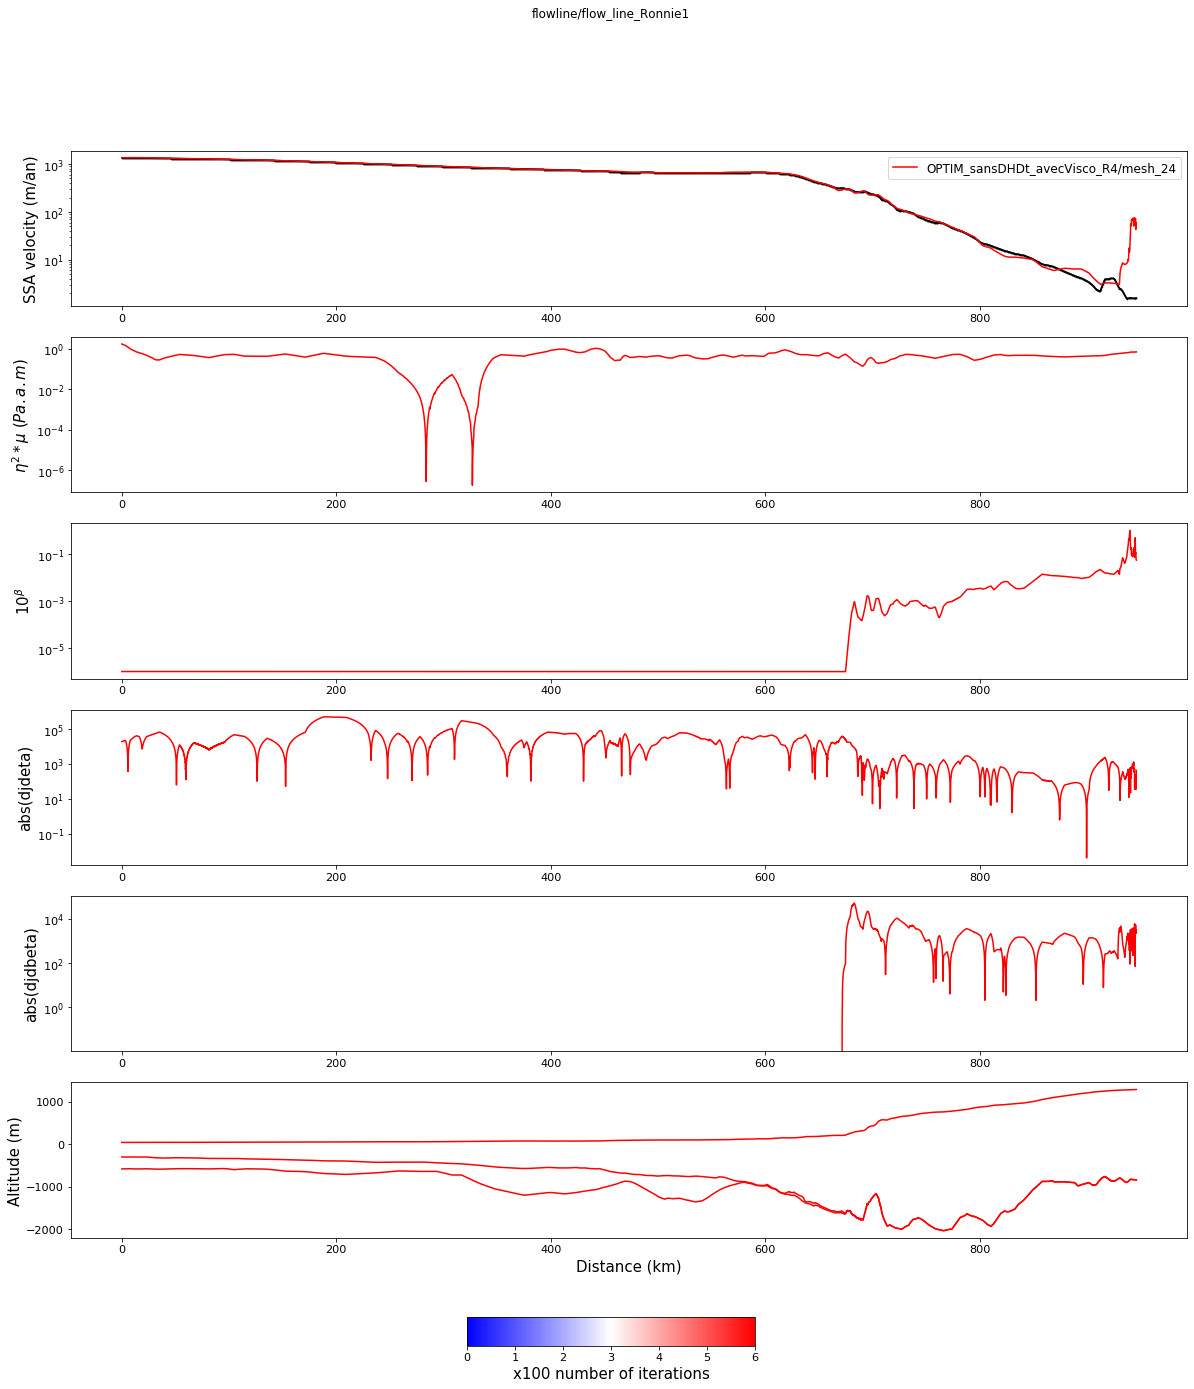

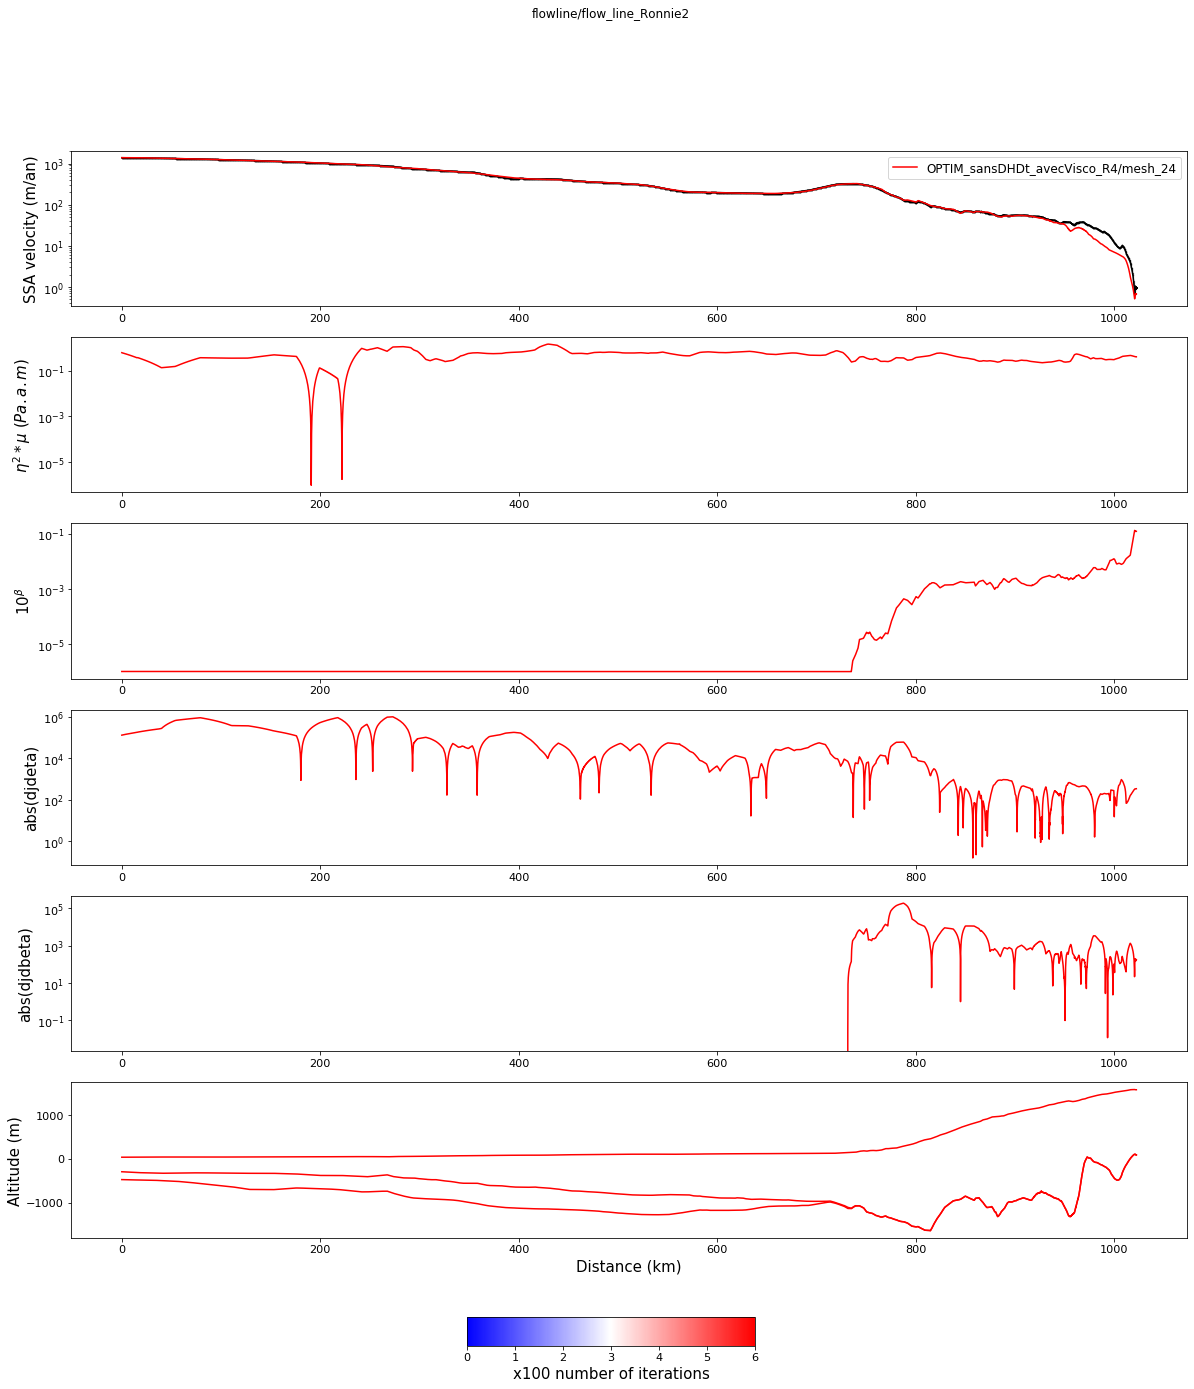

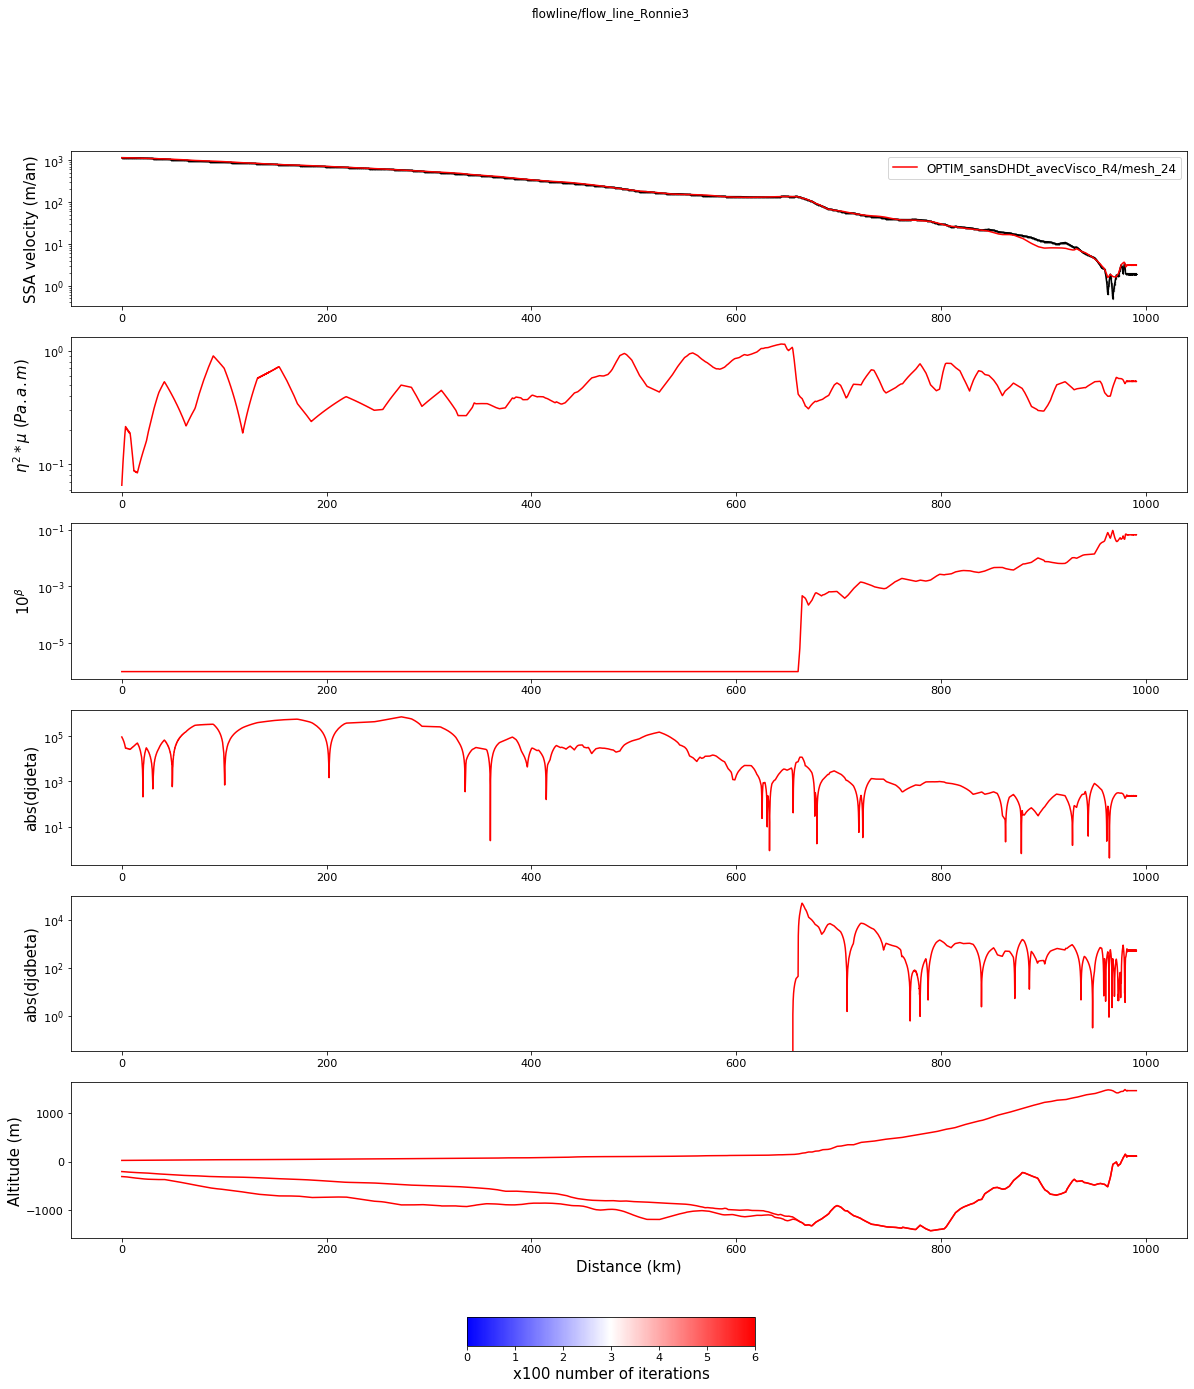

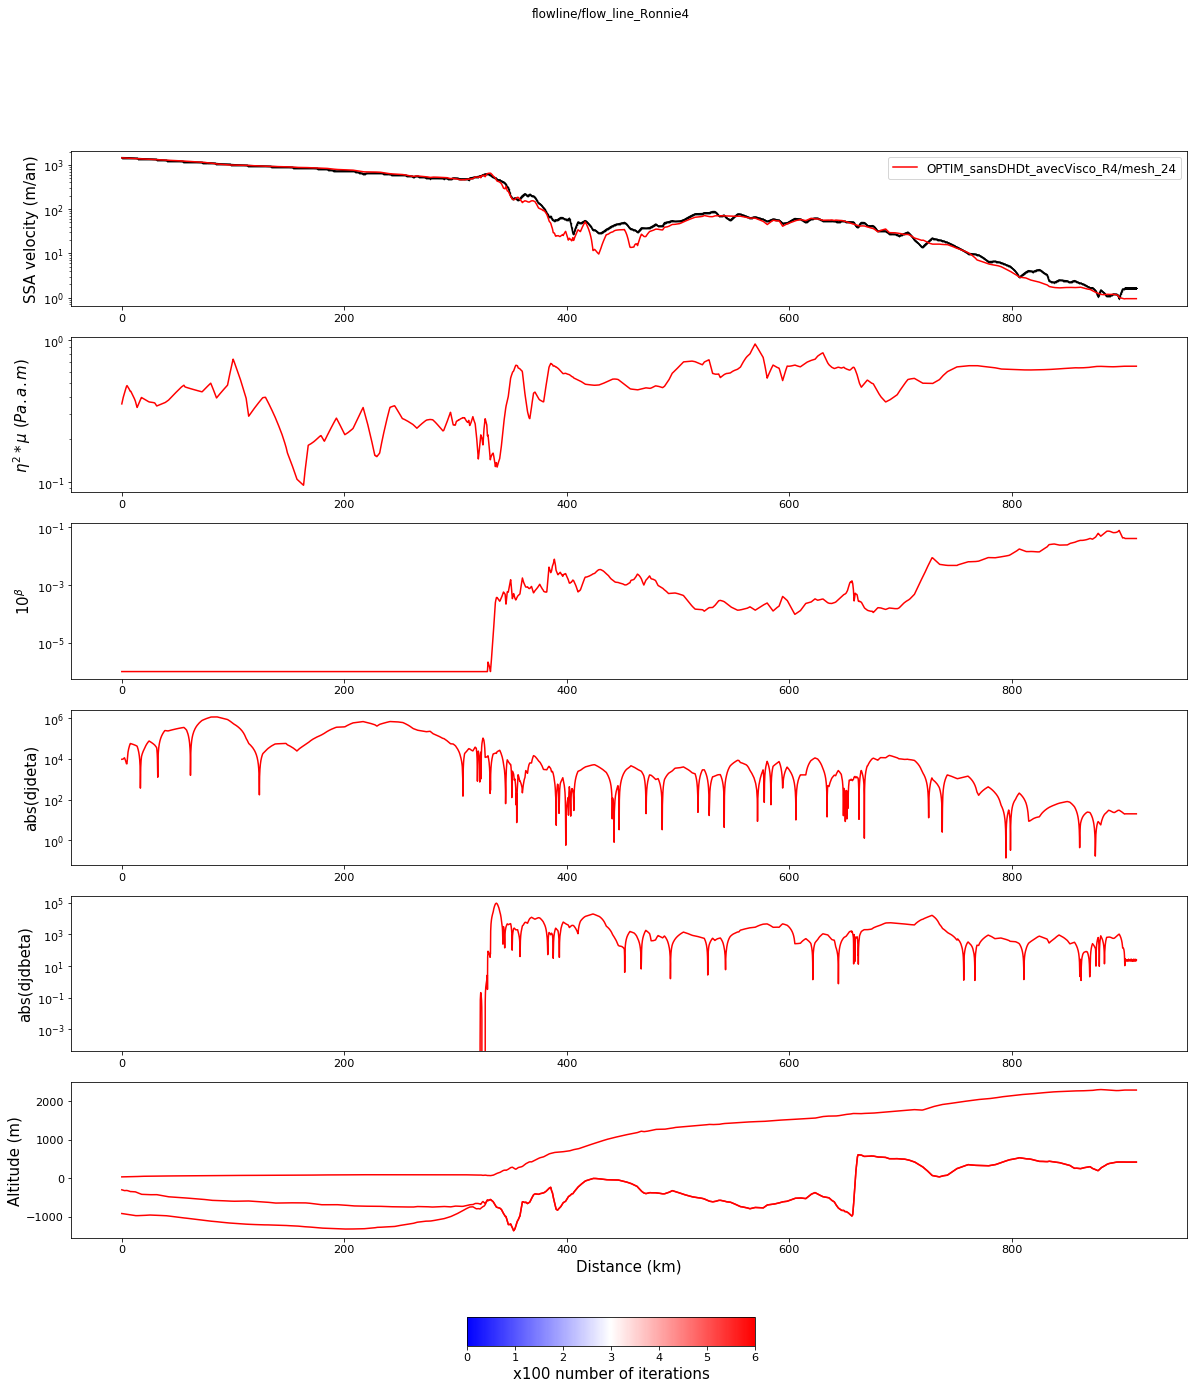

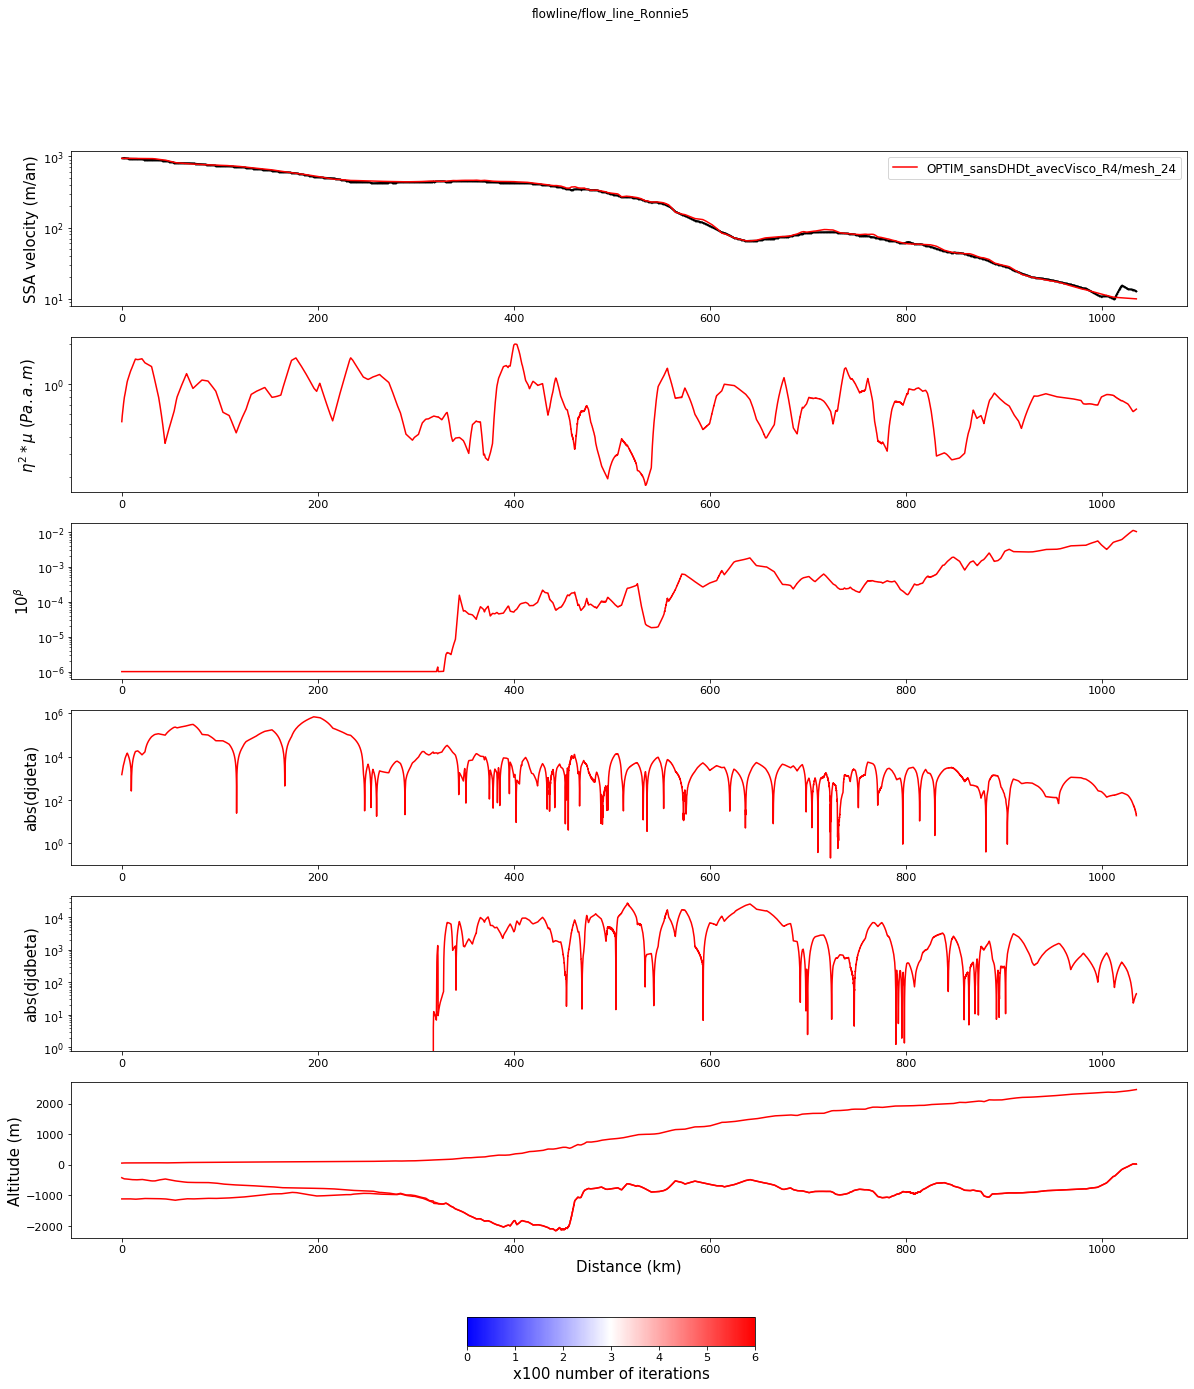

In [6]:
colors = plt.cm.bwr(np.linspace(0,1,len(blocks)))

import matplotlib as mpl

for n in range(0,len(flowlines)):
    xx=flowlines[n][52:-4]
    fig=plt.figure(figsize=[20,20])
   
    ax1=plt.subplot(6,1,1)
    ax2=plt.subplot(6,1,2)
    ax3=plt.subplot(6,1,3)
    ax6=plt.subplot(6,1,4)
    ax5=plt.subplot(6,1,5)
    ax4=plt.subplot(6,1,6)
    ax1.semilogy(globals()[xx]['dist'],globals()[xx]['uobs_mag'][0,],c='k',marker='.',markersize=0.5)
    for n in range(6,len(blocks)):
        ax1.semilogy(globals()[xx]['dist'],globals()[xx]['ssavelocity_mag'][n,],color=colors[n],label=url[80:-1])
        ax1.legend()
        ax1.set_ylabel('SSA velocity (m/an)')        
        
        ax2.semilogy(globals()[xx]['dist'],globals()[xx]['eta'][n,]**2*globals()[xx]['mu'][n,],color=colors[n])
        ax2.set_ylabel('$\eta^2 * \mu$ ($Pa.a.m$)')    
        
        ax3.semilogy(globals()[xx]['dist'],10**globals()[xx]['beta'][n,],color=colors[n])
        ax3.set_ylabel(r'$10^\beta$')
                
        ax5.semilogy(globals()[xx]['dist'],abs(globals()[xx]['djdbeta'][n,]),color=colors[n])
        ax5.set_ylabel('abs(djdbeta)')
        
        ax6.semilogy(globals()[xx]['dist'],abs(globals()[xx]['djdeta'][n,]),color=colors[n])
        ax6.set_ylabel('abs(djdeta)')
        
        im=ax4.plot(globals()[xx]['dist'],globals()[xx]['zs'][n,],color=colors[n])
        ax4.plot(globals()[xx]['dist'],globals()[xx]['bedrock'][n,],color=colors[n])
        ax4.plot(globals()[xx]['dist'],globals()[xx]['zb'][n,],color=colors[n],label=str(n))
        ax4.set_xlabel('Distance (km)')
        ax4.set_ylabel('Altitude (m)')

        ax7=fig.add_subplot(position=[0.4, 0.05, 0.2, 0.02])

        cmap = mpl.cm.bwr
        norm = mpl.colors.Normalize(vmin=0, vmax=len(blocks)-1)

        cb1 = mpl.colorbar.ColorbarBase(ax7, cmap=cmap,
                                        norm=norm,
                                        orientation='horizontal')
        cb1.set_label('x100 number of iterations')
        
    fig.suptitle(str(xx))
    

